**Ramiro Gracia Díaz-2010673-Thursday N4-N6**

Load Libraries, Load Data, Data Preprocessing

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

number_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = number_mnist.load_data()

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'Eight', 'Nine']

train_images = train_images / 255.0

test_images = test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


Model Selection and Training

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [3]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2554 - accuracy: 0.9274
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1133 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0770 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [4]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0767 - accuracy: 0.9790 - 638ms/epoch - 2ms/step

Test accuracy: 0.9789999723434448


In [5]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Model Test

In [6]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [7]:
np.argmax(predictions[0])

7

In [8]:
test_labels[0]

7

Model Plot

In [9]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

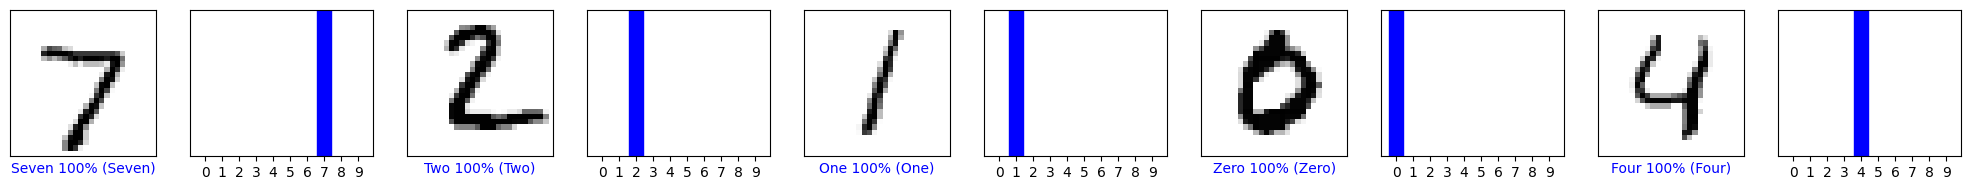

In [10]:
num_rows = 1
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()